# Convolutional Neural Network mit Data Augmentation
In diesem Notebook wird die Datenaugmentation zur Verbesserung des CNNs angewandt.

## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import os, shutil

import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

2024-05-10 18:32:57.281037: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 18:32:57.977358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'module://matplotlib_inline.backend_inline'

## Loading Data

In [2]:
original_dataset_dir = '../Aufgabenblatt_4_CNN/dogsvscats/train'

base_dir = '../Aufgabenblatt_4_CNN/dogsvscats_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

## Control of the data

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dogs images: 1000
total validation cat images: 500
total validation dogs images: 500
total test cat images: 500
total test dogs images: 500


## Data Gathering with Generator

### Data Augmentation
In diesem Schritt wird die Datenaugmentation durchgeführt.

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                                                                rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True
                                                             )

In [5]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape (20,)


## Building Model

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                                 input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/home/staudtyves/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-10 18:33:11.883949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6789 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:21:00.0, compute capability: 7.5


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling Model

In [9]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

## Fitting Model

In [10]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = validation_generator
)

Epoch 1/50


/home/staudtyves/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715358802.989952    7798 service.cc:145] XLA service 0x7f52ac004b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715358802.989993    7798 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-05-10 18:33:23.032315: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-10 18:33:23.176873: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - acc: 0.5500 - loss: 0.6882

I0000 00:00:1715358804.799910    7798 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - acc: 0.5172 - loss: 0.6964 - val_acc: 0.5720 - val_loss: 0.6861
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - acc: 0.5337 - loss: 0.6878 - val_acc: 0.5790 - val_loss: 0.6749
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - acc: 0.5783 - loss: 0.6802 - val_acc: 0.5100 - val_loss: 0.7037
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - acc: 0.5608 - loss: 0.6732 - val_acc: 0.5950 - val_loss: 0.6552
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - acc: 0.5774 - loss: 0.6626 - val_acc: 0.6040 - val_loss: 0.6578
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - acc: 0.6084 - loss: 0.6527 - val_acc: 0.6190 - val_loss: 0.6388
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - acc: 0.6319 - loss: 0.6432 - val_acc: 0.6460 - val_loss: 0.6228
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.6402 - loss: 0.6278 - val_acc: 0.6620 - val_loss: 0.6002
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s

## Visualisation of the Results

<Figure size 640x480 with 0 Axes>

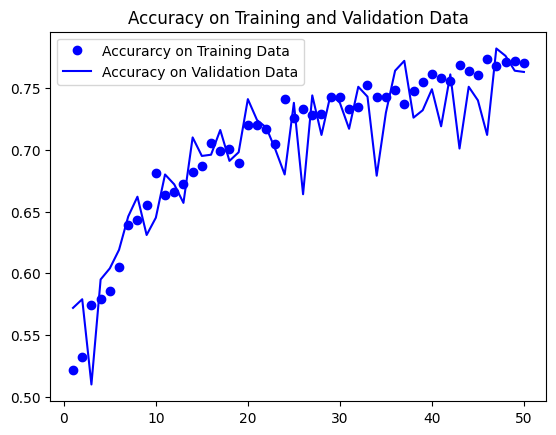

<Figure size 640x480 with 0 Axes>

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Accurarcy on Training Data')
plt.plot(epochs, val_acc, 'b', label = 'Accuracy on Validation Data')
plt.title('Accuracy on Training and Validation Data')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

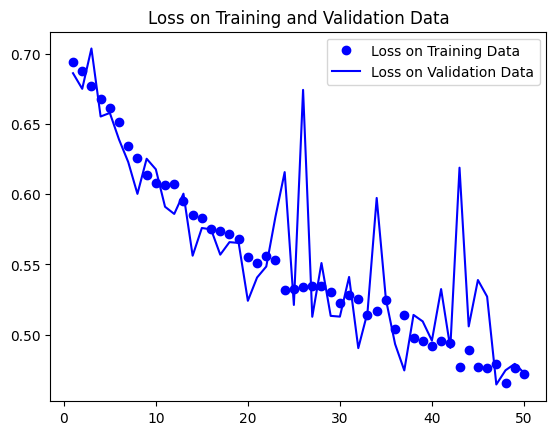

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(epochs, loss, 'bo', label='Loss on Training Data')
plt.plot(epochs, val_loss, 'b', label = 'Loss on Validation Data')
plt.title('Loss on Training and Validation Data')
plt.legend()
plt.figure()

## Model Prediction using Test Data

In [13]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [14]:
result = model.evaluate(test_generator)
print("test loss, test accuracy:", result)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.7904 - loss: 0.4735
test loss, test accuracy: [0.5046312212944031, 0.7570000290870667]


In [15]:
predict = model.predict(test_generator)
predict

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


array([[0.33122584],
       [0.38360673],
       [0.2588195 ],
       [0.15609497],
       [0.5951819 ],
       [0.54112816],
       [0.86511236],
       [0.2996097 ],
       [0.29574004],
       [0.01787015],
       [0.9935642 ],
       [0.98865473],
       [0.09305714],
       [0.9126768 ],
       [0.03585856],
       [0.43932286],
       [0.6474752 ],
       [0.0090198 ],
       [0.848958  ],
       [0.9913461 ],
       [0.498778  ],
       [0.12460802],
       [0.54952264],
       [0.69196624],
       [0.08958838],
       [0.11297986],
       [0.98895264],
       [0.46425763],
       [0.07614151],
       [0.9819884 ],
       [0.17920737],
       [0.14480475],
       [0.999912  ],
       [0.9852673 ],
       [0.9790101 ],
       [0.03117039],
       [0.9997644 ],
       [0.31420657],
       [0.72945976],
       [0.04048521],
       [0.79092044],
       [0.651419  ],
       [0.7509206 ],
       [0.01831235],
       [0.03142253],
       [0.85626   ],
       [0.45500594],
       [0.990

In [16]:
def label(predict):

    prediction_array = np.where(predict > 0.5, 'Dog', 'Cat')

    return prediction_array

In [17]:
df_test = pd.DataFrame({'file': test_generator.filenames , 'label_prediction': label(predict).flatten()})
df_test

,file,label_prediction
0,cats/cat.1500.jpg,Cat
1,cats/cat.1501.jpg,Cat
2,cats/cat.1502.jpg,Cat
3,cats/cat.1503.jpg,Cat
4,cats/cat.1504.jpg,Dog
...,...,...
995,dogs/dog.1995.jpg,Cat
996,dogs/dog.1996.jpg,Dog
997,dogs/dog.1997.jpg,Dog
998,dogs/dog.1998.jpg,Dog


## REFERENCES
Francois Chollet (2018), Deep Learning with Keras, Manning.